In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [3]:
part1 = pd.read_csv('part1.csv')
part1

,Harmonic,Lower Bound (Hz),Upper Bound (Hz),Center (Hz)
0,1,11.1,11.4,11.25
1,2,22.1,22.7,22.40
2,3,32.6,33.8,33.20
3,4,44.5,45.2,44.85
4,5,55.8,56.6,56.20
5,6,67.1,68.0,67.55


In [8]:
harmonics = part1['Harmonic']
lower_bounds = part1['Lower Bound (Hz)']  
upper_bounds = part1['Upper Bound (Hz)']
center_frequencies = part1['Center (Hz)']

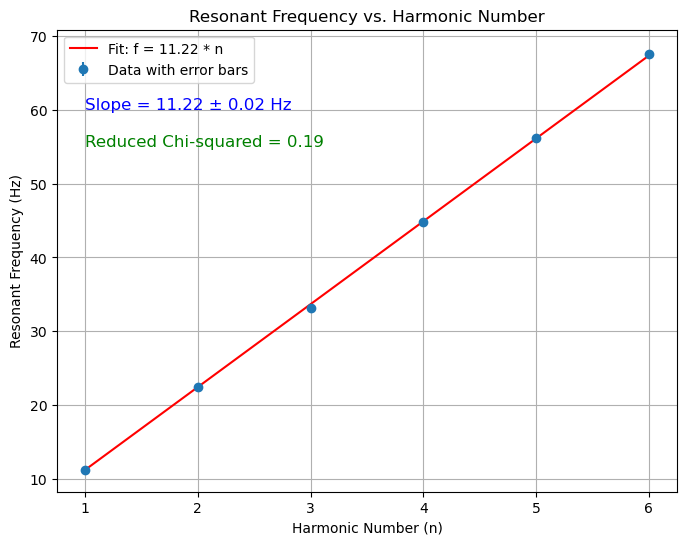

In [11]:
lower_errors = center_frequencies - lower_bounds
upper_errors = upper_bounds - center_frequencies

def linear_model(n, a):
    return a * n

params, covariance = curve_fit(linear_model, harmonics, center_frequencies)
slope = params[0] 
params, covariance = curve_fit(linear_model, harmonics, center_frequencies)
slope = params[0]

slope_error = np.sqrt(covariance[0, 0]) 


errors = (upper_errors + lower_errors) / 2

residuals = center_frequencies - linear_model(harmonics, *params)
normalized_residuals = residuals / (upper_errors + lower_errors)

degrees_of_freedom = 5
# Calculate chi-squared with new symmetric errors
chi_squared = np.sum((residuals**2) / (errors**2))
reduced_chi_squared = chi_squared / degrees_of_freedom


plt.figure(figsize=(8, 6))
plt.errorbar(harmonics, center_frequencies, yerr=[lower_errors, upper_errors], fmt='o', label='Data with error bars')
plt.plot(harmonics, linear_model(harmonics, *params), 'r-', label=f'Fit: f = {slope:.2f} * n')

# Adding text for slope, its error, and chi-squared calculated with midpoint errors
plt.text(1, 60, f"Slope = {slope:.2f} ± {slope_error:.2f} Hz", color="blue", fontsize=12)
plt.text(1, 55, f"Reduced Chi-squared = {reduced_chi_squared:.2f}", color="green", fontsize=12)

plt.xlabel("Harmonic Number (n)")
plt.ylabel("Resonant Frequency (Hz)")
plt.title("Resonant Frequency vs. Harmonic Number")
plt.legend()
plt.grid(True)
plt.show()

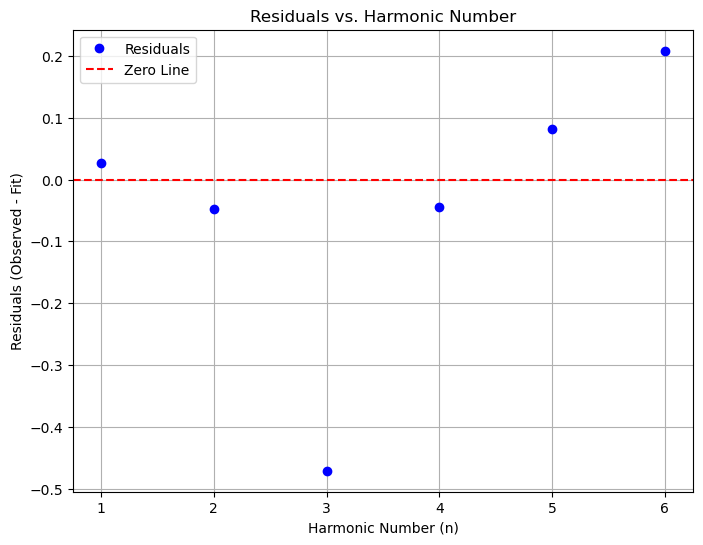

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(harmonics, residuals, 'bo', label='Residuals')
plt.axhline(0, color='r', linestyle='--', label='Zero Line')

plt.xlabel("Harmonic Number (n)")
plt.ylabel("Residuals (Observed - Fit)")
plt.title("Residual Plot")
plt.legend()
plt.grid(True)
plt.show()

## part 2


In [7]:
part2 = pd.read_csv('part2.csv')
part2

,mode,estimated_mass,mass,lower,upper
0,2,661.99,396,383,406
1,3,294.21,245,235,255
2,4,165.49,153,148,158
3,5,105.91,103,100,108
4,6,73.55,65,65,65
5,7,54.04,50,50,50


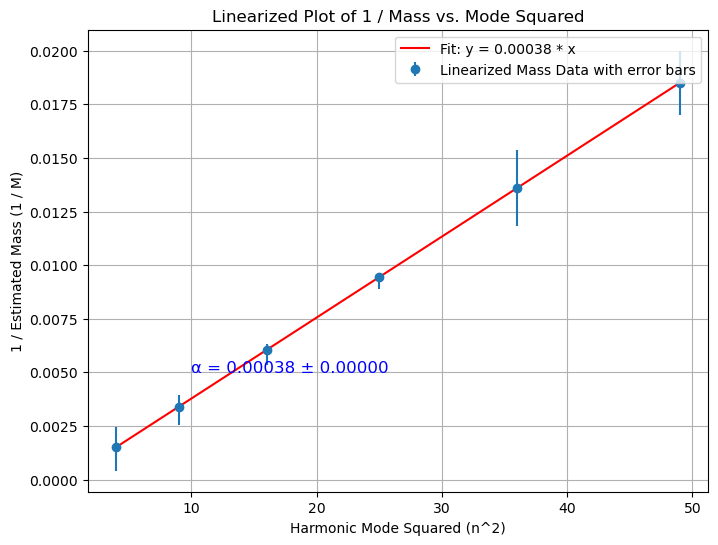

In [16]:
harmonic_modes = np.array([2, 3, 4, 5, 6, 7])
estimated_mass = np.array([661.99, 294.21, 165.49, 105.91, 73.55, 54.04])  # Estimated mass in grams
lower_mass_bound = np.array([383, 235, 148, 100, 65, 50])  # Lower mass bound in grams
upper_mass_bound = np.array([406, 255, 158, 108, 65, 50])  # Upper mass bound in grams

# Calculate the inverse of the estimated mass for linearization
inverse_estimated_mass = 1 / estimated_mass
harmonic_modes_squared = harmonic_modes**2
def linear_model(x, alpha):
    return alpha * x

# Perform the fit with the linearized data (1 / mass vs. mode squared)
params_mass, covariance_mass = curve_fit(linear_model, harmonic_modes_squared, inverse_estimated_mass)
alpha_mass = params_mass[0]  # Fitted alpha value for mass data
alpha_mass_error = np.sqrt(covariance_mass[0, 0])  # Error in alpha
lower_error = np.abs(inverse_estimated_mass - 1 / lower_mass_bound)
upper_error = np.abs(1 / upper_mass_bound - inverse_estimated_mass)

# Plotting the data with corrected error bars
plt.figure(figsize=(8, 6))
plt.errorbar(harmonic_modes_squared, inverse_estimated_mass, fmt='o', 
             yerr=[lower_error, upper_error], label='Linearized Mass Data with error bars')
plt.plot(harmonic_modes_squared, linear_model(harmonic_modes_squared, *params_mass), 'r-', label=f'Fit: y = {alpha_mass:.5f} * x')

# Annotating alpha with error on the plot for mass data
plt.text(10, 0.005, f"α = {alpha_mass:.5f} ± {alpha_mass_error:.5f}", color="blue", fontsize=12)

plt.xlabel("Harmonic Mode Squared (n^2)")
plt.ylabel("1 / Estimated Mass (1 / M)")
plt.title("Linearized Plot of 1 / Mass vs. Mode Squared")
plt.legend()
plt.grid(True)
plt.show()

# Part 3

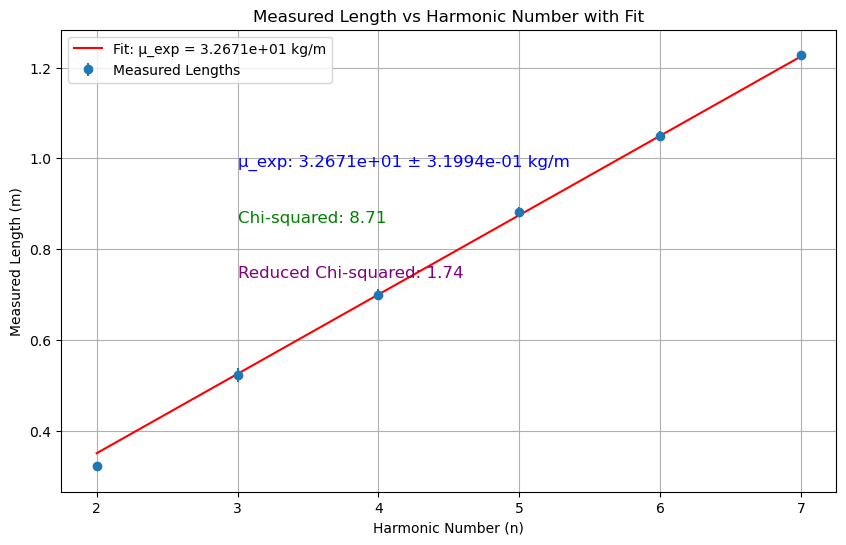

(32.6706062887425, 0.31994204348024574, 8.712174026505688, 1.7424348053011376)

In [17]:
n_values = np.array([2, 3, 4, 5, 6, 7])
measured_lengths = np.array([32.14, 52.30, 69.95, 88.20, 105.0, 122.8])  # Lengths in cm
length_errors = np.array([1.0, 1.5, 1.2, 1.1, 1.0, 0.9]) * 1e-2  # Errors in meters

# Convert lengths to meters
measured_lengths_m = measured_lengths * 1e-2

# Define the theoretical model for length as a function of harmonic number
def theoretical_length(n, mu_exp):
    return n / np.sqrt(mu_exp)

# Perform the fit with the provided data
popt, pcov = curve_fit(theoretical_length, n_values, measured_lengths_m, sigma=length_errors, absolute_sigma=True)
mu_exp = popt[0]
mu_exp_error = np.sqrt(np.diag(pcov))[0]

# Calculate residuals and chi-squared
residuals = measured_lengths_m - theoretical_length(n_values, mu_exp)
chi_squared = np.sum((residuals / length_errors) ** 2)
degrees_of_freedom = len(n_values) - 1  # Number of data points - number of parameters
reduced_chi_squared = chi_squared / degrees_of_freedom

# Plot measured length vs harmonic number with fit and error bars
plt.figure(figsize=(10, 6))
plt.errorbar(n_values, measured_lengths_m, yerr=length_errors, fmt='o', label='Measured Lengths')
plt.plot(n_values, theoretical_length(n_values, mu_exp), label=f'Fit: μ_exp = {mu_exp:.4e} kg/m', color='red')
plt.xlabel('Harmonic Number (n)')
plt.ylabel('Measured Length (m)')
plt.title('Measured Length vs Harmonic Number with Fit')
plt.legend()

# Annotate measured linear mass density, its error, and chi-squared on the plot
plt.text(3, max(measured_lengths_m) * 0.8, f'μ_exp: {mu_exp:.4e} ± {mu_exp_error:.4e} kg/m', fontsize=12, color='blue')
plt.text(3, max(measured_lengths_m) * 0.7, f'Chi-squared: {chi_squared:.2f}', fontsize=12, color='green')
plt.text(3, max(measured_lengths_m) * 0.6, f'Reduced Chi-squared: {reduced_chi_squared:.2f}', fontsize=12, color='purple')
plt.grid(True)
plt.show()

mu_exp, mu_exp_error, chi_squared, reduced_chi_squared
